In [1]:
from choice_learn.datasets import load_modecanada

dataset = load_modecanada(as_frame=True)
dataset.head()

,Unnamed: 0,case,alt,choice,dist,cost,ivt,ovt,freq,income,urban,noalt
0,1,1,train,0,83,28.25,50,66,4,45.0,0,2
1,2,1,car,1,83,15.77,61,0,0,45.0,0,2
2,3,2,train,0,83,28.25,50,66,4,25.0,0,2
3,4,2,car,1,83,15.77,61,0,0,25.0,0,2
4,5,3,train,0,83,28.25,50,66,4,70.0,0,2


In [2]:
# Let's check one specific situation
dataset.loc[dataset.case == 1]

,Unnamed: 0,case,alt,choice,dist,cost,ivt,ovt,freq,income,urban,noalt
0,1,1,train,0,83,28.25,50,66,4,45.0,0,2
1,2,1,car,1,83,15.77,61,0,0,45.0,0,2


In [3]:
from choice_learn.data import ChoiceDataset

choice_dataset = ChoiceDataset.from_single_long_df(
  df=dataset,
  shared_features_columns=["income"],
  items_features_columns=["cost", "ivt", "ovt", "freq"],
  items_id_column="alt",
  choices_id_column="case",
  choices_column="choice",
  choice_format="one_zero",
)

In [4]:
from choice_learn.models import ConditionalLogit

# Initialize the model
model = ConditionalLogit()

# Create the different weights:
# Shared coefficients apply to all items in the list
# (e.g., price, frequency, and ovt)
model.add_shared_coefficient(feature_name="cost",
  items_indexes=[0, 1, 2, 3])

model.add_shared_coefficient(feature_name="freq",
  coefficient_name="beta_frequence",
  items_indexes=[0, 1, 2, 3])

model.add_shared_coefficient(feature_name="ovt",
  items_indexes=[0, 1, 2, 3])

# 'ivt' has a separate coefficient for each item
model.add_coefficients(feature_name="ivt",
  items_indexes=[0, 1, 2, 3])

# Add intercept and income coefficients,
# applied to all items except the first one (which is zeroed)
model.add_coefficients(feature_name="intercept",
  items_indexes=[1, 2, 3])

model.add_coefficients(feature_name="income",
  items_indexes=[1, 2, 3])

2024-10-02 10:12:28.794495: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 10:12:28.799055: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 10:12:28.844218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 10:12:30.046458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using L-BFGS optimizer, setting up .fit() function


2024-10-02 10:12:30.968097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-02 10:12:30.968427: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-02 10:12:30.992941: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required l

In [5]:
history = model.fit(choice_dataset, get_report=True, verbose=2)
model.report

Using L-BFGS optimizer, setting up .fit() function


,Coefficient Name,Coefficient Estimation,Std. Err,z_value,P(.>z)
0,beta_cost,-0.007464,0.002941,-2.537793,0.011155
1,beta_frequence,0.075283,0.004203,17.913368,0.000000
2,beta_ovt,-0.040078,0.002365,-16.949242,0.000000
3,beta_ivt_0,0.000294,0.004265,0.068942,0.945036
4,beta_ivt_1,-0.011630,0.001637,-7.103386,0.000000
5,beta_ivt_2,-0.015734,0.000991,-15.879160,0.000000
6,beta_ivt_3,-0.006221,0.000682,-9.116198,0.000000
7,beta_intercept_0,1.108140,0.271243,4.085420,0.000044
8,beta_intercept_1,2.767573,0.176806,15.653156,0.000000
9,beta_intercept_2,3.250664,0.246447,13.190123,0.000000


                                    fit models needing them such as Conditional Logit.
                                fit models needing them such as Conditional Logit.
                                    fit models needing them such as Conditional Logit.
                                fit models needing them such as Conditional Logit.


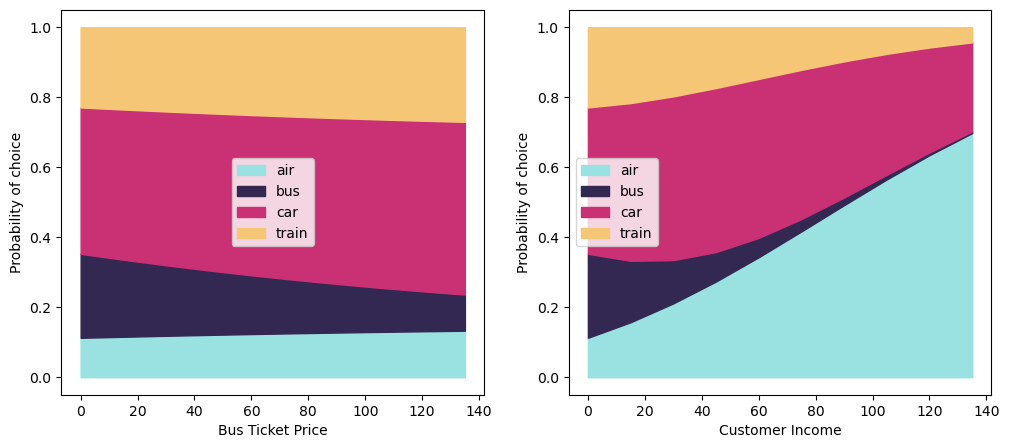

In [10]:
import matplotlib.pyplot as plt
import numpy as np

shared_features_by_choice = [choice_dataset.shared_features_by_choice[0][100]]*10
items_features_by_choice = [choice_dataset.items_features_by_choice[0][100].copy() for _ in range(10)]

colors = ["#9ae1e2", "#332851", "#ca3074", "#f6c677"]
values = []
for i in range(10):
    items_features_by_choice[i][1][0] = 15 * i
    values.append(items_features_by_choice[i][1][0])
play_dataset = ChoiceDataset(
    shared_features_by_choice = shared_features_by_choice,
    items_features_by_choice = items_features_by_choice,
    choices = choice_dataset.choices[:10]
)

probs = model.predict_probas(play_dataset)

items = ['bus', "car", "train"]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.fill_between(values, [0 for _ in values], probs[:, 0], label=f"air", color=colors[0])
for i in range(1, 4):
    plt.fill_between(values, np.sum(probs[:, :i], axis=1), np.sum(probs[:, :i+1], axis=1), label=f"{items[i-1]}", color=colors[i])
plt.xlabel("Bus Ticket Price")
plt.ylabel("Probability of choice")
plt.legend()


shared_features_by_choice = [choice_dataset.shared_features_by_choice[0][100].copy() for _ in range(10)]
items_features_by_choice = [choice_dataset.items_features_by_choice[0][100].copy() for _ in range(10)]
for i in range(10):
    shared_features_by_choice[i][0] += 10 * i
play_dataset = ChoiceDataset(
    shared_features_by_choice = shared_features_by_choice,
    items_features_by_choice = items_features_by_choice,
    choices = choice_dataset.choices[:10]
)

probs = model.predict_probas(play_dataset)

plt.subplot(1, 2, 2)
plt.fill_between(values, [0 for _ in values], probs[:, 0], label=f"air", color=colors[0])
for i in range(1, 4):
    plt.fill_between(values, np.sum(probs[:, :i], axis=1), np.sum(probs[:, :i+1], axis=1), label=f"{items[i-1]}", color=colors[i])
    
plt.xlabel("Customer Income")
plt.ylabel("Probability of choice")
plt.legend()